# Знакомство с Фибоначчи

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювером назначаете http://github.com/michael15346/ .
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 14 октября 10:00**

В этом домашнем задании вы реализуете три разных способа вычисления чисел Фибоначчи: рекурсивный, итеративный (линейный) и с помощью матричного представления. Для каждого метода нужно будет реализовать функцию, которая принимает на вход целое число `n` и возвращает `n`-е число Фибоначчи.

Числа Фибоначчи — это последовательность чисел, в которой каждое число равно сумме двух предыдущих чисел. Последовательность начинается с:


$$F(0) = 0, \quad F(1) = 1, \quad F(n) = F(n-1) + F(n-2) \quad \text{для } n \geq 2$$


## Задача 1: Числа Фибоначчи с помощью рекурсии

Реализуйте функцию `fib_recursive(n)`, которая вычисляет `n`-е число Фибоначчи с помощью рекурсии.

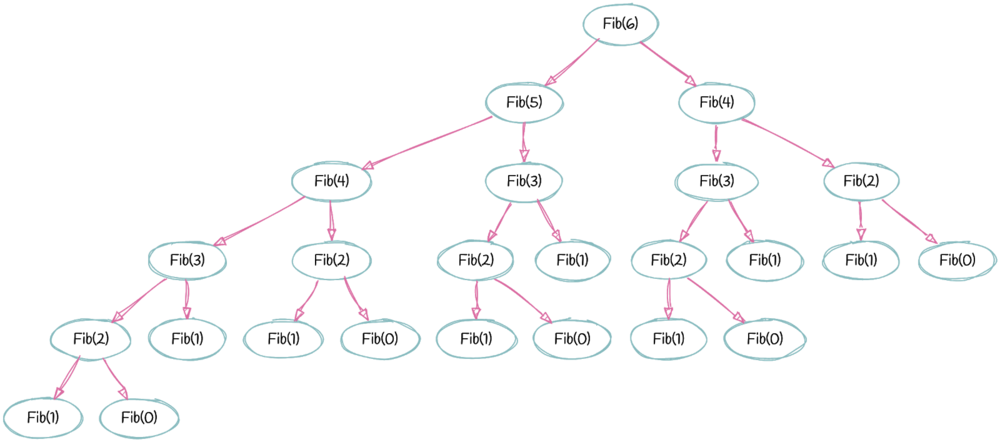

In [10]:
def fib_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursive(n - 1) + fib_recursive(n - 2)

In [11]:
print(fib_recursive(10))  # Ожидаемый результат: 55

55


Рекурсивное решение является наглядным, но его вычислительная сложность составляет  $O(2^n)$ , так как оно пересчитывает одно и то же значение несколько раз.

## Задача 2: Линейный метод (итеративный)

Итеративный подход значительно эффективнее. Мы вычисляем числа Фибоначчи по порядку, начиная с  `F(0)`  и  `F(1)` , и продолжаем до  `F(n)`. Реализуйте функцию `fib_iterative(n)`, которая вычисляет  $n$-е число Фибоначчи линейным методом (итеративно).



In [12]:
def fib_iterative(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

Этот метод имеет временную сложность $O(n)$ и использует константную память  $O(1)$. В отличие от рекурсии, этот способ вычисления не требует дополнительных затрат на пересчёт.

## Задача 3: Вычисление чисел Фибоначчи с помощью матричного представления

Числа Фибоначчи могут быть вычислены с использованием матричного возведения в степень. Это более продвинутый метод, который можно использовать для вычисления  n -го числа Фибоначчи за логарифмическое время.

**Матричное представление:**

$$\begin{pmatrix}
 1 & 1 \\
 1 & 0
\end{pmatrix}^n =
\begin{pmatrix}
 F_{n+1} & F_n \\
 F_n     & F_{n-1}
\end{pmatrix}$$

Реализуйте вспомогательную функцию `multiply_matrices` для перемножения двух матриц.

```
A = [[1, 5],[3, 2]]
B = [[2, 1],[1, 2]]
print(multiply_matrices(A, B))
[[7, 11], [8, 7]]
```


In [13]:
def multiply_matrices(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])
    
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

**Возведение матрицы в степень** — ключевая операция в матричном методе для вычисления чисел Фибоначчи за  $O(\log n)$ . Для этого используется эффективная техника возведения в степень, известная как метод “разделяй и властвуй” (или экспоненциальное возведение в степень). Этот метод позволяет сократить количество умножений матриц с линейного до логарифмического.

**Идея метода “разделяй и властвуй”**

Предположим, что нам нужно возвести матрицу  $M$  в степень  $n$ , то есть найти  $M^n$ . Если просто умножать матрицу на саму себя  n  раз, это займёт  $O(n)$  операций. Однако можно значительно ускорить процесс с помощью метода “разделяй и властвуй”.

**Правила:**

1.	Если  n  чётное, то:

$$M^n = M^{n/2} \times M^{n/2}$$

То есть можно возвести матрицу в степень  $n/2$ , а затем просто умножить её на саму себя.

2.	Если  n  нечётное, то:

$$M^n = M \times M^{n-1}$$

То есть мы можем вычислить  $M^{n-1}$ , а затем умножить результат на  $M$ .

Эти правила позволяют уменьшать степень в два раза на каждом шаге, что и даёт логарифмическое время для вычисления.

**Шаги алгоритма:**

1.	Если степень  $n = 1$ , то просто возвращаем матрицу  $M$ , так как  $M^1 = M$ .
2.	Если степень  $n$  чётная, делим степень на $2$, возводим матрицу в полученную степень и умножаем результат сам на себя.
3.	Если степень  $n$  нечётная, вычитаем $1$, возводим матрицу в степень  $n-1$ , а затем умножаем результат на исходную матрицу.

Пример:

Рассмотрим возведение матрицы  $M$  в степень $10$:
- $M^{10} = M^5 \times M^5$ 
- $M^5 = M \times M^4$
- $M^4 = M^2 \times M^2$
- $M^2 = M \times M$ 

Каждый шаг уменьшает степень вдвое, что даёт логарифмическое количество шагов (в данном случае  $\log_2 10 \approx 4$ ). Реализуйте вспомогательную функцию `matrix_power` для возведения матрицы в степень.

```python
A = [[1, 5],[3, 2]]
print(matrix_power(A, 11))
[[50148166, 73659185], [44195511, 64880003]]
```

multiply_matrices` для перемножения двух матриц.

In [14]:

def matrix_power(matrix, n):
    size = len(matrix)
    result = [[1 if i == j else 0 for j in range(size)] for i in range(size)]
    
    for _ in range(n):
        result = multiply_matrices(result, matrix)
    
    return result

Теперь реализуйте функцию `fib_matrix(n)`, которая вычисляет $n$-е число Фибоначчи с помощью возведения матрицы в степень.

In [15]:
def fib_matrix(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    
    F = [[1, 1],
         [1, 0]]
    
    result = matrix_power(F, n - 1)
    
    return result[0][0]

Этот метод работает за  $O(\log n)$ , так как возведение матрицы в степень можно сделать за логарифмическое время с помощью метода “разделяй и властвуй”. Метод эффективен для вычисления больших значений  $n$ , так как его асимптотика лучше линейного метода.

Воспользуйтесь магическим методом `%%time` и замерьте время вычисления. Обратите внимание как сильно у нас получилось с оптимизировать вычисление чисел Фибоначчи.

In [16]:
%%time 
fib_recursive(11)

CPU times: user 40 μs, sys: 10 μs, total: 50 μs
Wall time: 54.6 μs


89

In [17]:
%%time 
fib_iterative(500)

CPU times: user 55 μs, sys: 14 μs, total: 69 μs
Wall time: 238 μs


139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125

In [18]:
%%time 
fib_matrix(920)

CPU times: user 4.72 ms, sys: 202 μs, total: 4.92 ms
Wall time: 6.41 ms


830126021787055047622441572678655992350572415327460154154529445889109757788994107326186690751365241695215886721154737728593181500199549345260535478509541567521282541694147401525840003191120565